# Load Cats and Dogs Images

## Install Packages

In [1]:
!pip install --upgrade keras==2.2.4
!pip install --upgrade tensorflow==1.13.1 
!pip install --upgrade 'numpy<1.15.0'

> **Note:** After running the pip command you should restart the Jupyter kernel.<br>
> To restart the kernel, click on the kernel-restart button in the notebook menu toolbar (the refresh icon next to the **Code** button).

## Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python.
# For example, here are several helpful packages to load:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import load_img

# Input data files are available in the "../input/" directory.
# For example, running the following (by selecting 'Run' or pressing Shift+Enter) will list the files in the input directory:

import matplotlib.pyplot as plt
import random

import os
import zipfile

# Define locations
BASE_PATH = os.getcwd()
DATA_PATH = BASE_PATH + "/cats_and_dogs_filtered/"
!mkdir model
MODEL_PATH = BASE_PATH + '/model/'

# Define image parameters
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/User/.pythonlibs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/User/.pythonlibs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/User/.pythonlibs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/User/.pythonlibs/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
DATA_PATH + 'catsndogs.zip'

'/User/tutorials/demos/horovod/gpu/image-classification/cats_and_dogs_filtered/catsndogs.zip'

## Download the Data

In [3]:
!mkdir cats_and_dogs_filtered
# Download a sample stocks file from Iguazio demo bucket in AWS S3
!curl -L "iguazio-sample-data.s3.amazonaws.com/catsndogs.zip" > ./cats_and_dogs_filtered/catsndogs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.2M  100 65.2M    0     0  13.9M      0  0:00:04  0:00:04 --:--:-- 15.3M


In [4]:
zip_ref = zipfile.ZipFile(DATA_PATH + 'catsndogs.zip', 'r')
zip_ref.extractall('cats_and_dogs_filtered')
zip_ref.close()

## Prepare the Traning Data

In [5]:
import json

In [6]:
def build_prediction_map(categories_map):
    return {v:k for k ,v in categories_map.items()}

In [7]:
# Create a file-names list (JPG image-files only)
filenames = [file for file in os.listdir(DATA_PATH+"/cats_n_dogs") if file.endswith('jpg')]
categories = []

# Categories and prediction-classes map
categories_map = {
    'dog': 1,
    'cat': 0,
}
prediction_map = build_prediction_map(categories_map)
with open(MODEL_PATH + 'prediction_classes_map.json', 'w') as f:
    json.dump(prediction_map, f)

# Create a pandas DataFrame for the full sample
for filename in filenames:
    category = filename.split('.')[0]
    categories.append([categories_map[category]])

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df['category'] = df['category'].astype('str');

In [8]:
df.head()

,filename,category
0,cat.0.jpg,[0]
1,cat.1.jpg,[0]
2,cat.10.jpg,[0]
3,cat.100.jpg,[0]
4,cat.101.jpg,[0]


In [9]:
df.tail()

,filename,category
1995,dog.995.jpg,[1]
1996,dog.996.jpg,[1]
1997,dog.997.jpg,[1]
1998,dog.998.jpg,[1]
1999,dog.999.jpg,[1]


## Check the Total Image Count

Check the total image count for each category.<br>
The data set has 12,000 cat images and 12,000 dog images.

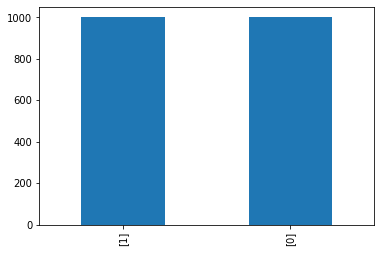

In [10]:
df['category'].value_counts().plot.bar()

## Display the Sample Image

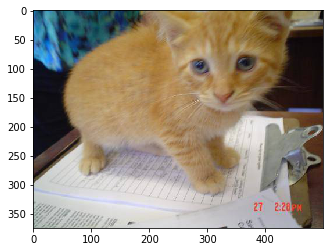

In [11]:
sample = random.choice(filenames)
image = load_img(DATA_PATH+"/cats_n_dogs/"+sample)
plt.imshow(image)